# "ArviZ customization with rcParams"
> "Use ArviZ rcParams to get sensible defaults right out of the box"

- toc: true
- author: Oriol Abril
- badges: true
- categories: [arviz, customization, rcparams]

# About
ArviZ not only builds on top of matplotlib's `rcParams` but also adds its own rcParams instance to handle specific settings. This post will only graze matplotlib's rcParams, which are already detailed in [matplotlib's docs](https://matplotlib.org/1.4.1/users/customizing.html); it will dive into specific ArviZ rcParams.

# Introduction
Paraphrasing the description on rcParams in the documentation of matplotlib:

> ArviZ uses arvizrc configuration files to customize all kinds of properties, which we call rcParams. You can control the defaults of many properties in ArviZ: data loading mode (lazy or eager), automatically showing generated plots, the default information criteria and so on.

There are several ways of modifying `arviz.rcParams` instance, each of them targeted to specific needs.

In [1]:
import arviz as az
import matplotlib.pyplot as plt

idata = az.load_arviz_data("centered_eight")

# Customizing ArviZ

## arvizrc file
To define default values on a per user or per project basis, `arvizrc` file should be used. When imported, ArviZ search for an `arvizrc` file in several locations sorted below by priority:
- `$PWD/arvizrc`
- `$ARVIZ_DATA/arvizrc`
- On Linux,
  - `$XDG_CONFIG_HOME/arviz/arvizrc` (if `$XDG_CONFIG_HOME`
  is defined)
  - or `$HOME/.config/arviz/arvizrc` (if `$XDG_CONFIG_HOME`
  is not defined)
- On other platforms,
  - `$HOME/.arviz/arvizrc` if `$HOME` is defined
    
Once one of these files is found, ArviZ stops looking and loads its configuration. If none of them are present, the values hardcoded in ArviZ codebase are used. The file used to set the default values in ArviZ can be obtained with the following command:

In [2]:
import arviz as az
print(az.rcparams.get_arviz_rcfile())

/home/oriol/.config/arviz/arvizrc


ArviZ has loaded a file used to set defaults on a per user basis. Unless I use a different rc file in the current directory or modify `rcParams` as explained above, this configuration will be automatically used every time ArviZ is imported. 

This can be really useful to define the favourite backend or information criterion, written once in the rc file and ArviZ automatically uses the desired values.

> Important: You should not rely on ArviZ defaults being always the same.

ArviZ strives to encourage best practices and therefore will change the default values whenever a new algorithm is developed to achieve this goal. If you rely on a specific value, you should either use an `arvizrc` template or set the defaults at the beggining of every script/notebook.

## Dynamic rc settings
To set default values on a per file or per project basis, `rcParams` can also be modified dynamically, either overwritting a specific key:

In [3]:
az.rcParams["data.load"] = "eager"

Note that `rcParams` is the instance to be modified, exactly like in matplotlib. Careful with capitalization!

Another option is to define a dictionary with several new defaults and update rcParams all at once. 

In [4]:
rc = {
    "data.load": "lazy",
    "plot.max_subplots": 30,
    "stats.ic_scale": "negative_log",
    "plot.matplotlib.constrained_layout": False
}
az.rcParams.update(rc)

## rc_context
And last but not least, to temporarily use a different set of defaults, ArviZ also has a [`rc_context`](https://arviz-devs.github.io/arviz/generated/arviz.rc_context.html#arviz.rc_context) function. Its main difference and advantage is that it is a context manager, therefore, all code executed inside the context will use the defaults defined by `rc_context` but once we exit the context, everything goes back to normal. Let's generate 3 posterior plots with the same command to show this:

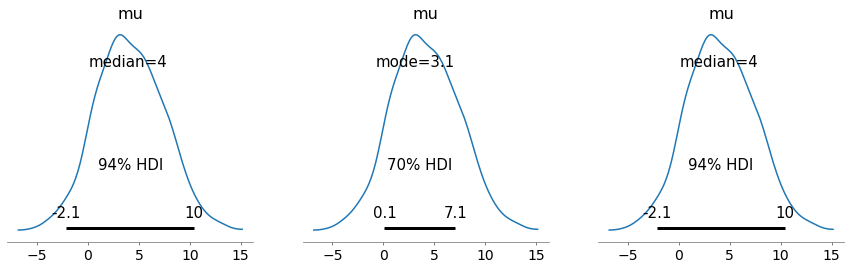

In [5]:
_, axes = plt.subplots(1,3, figsize=(15,4))

az.plot_posterior(idata, var_names="mu", ax=axes[0])

with az.rc_context({"plot.point_estimate": "mode", "stats.hdi_prob": 0.7}):
    az.plot_posterior(idata, var_names="mu", ax=axes[1])

az.plot_posterior(idata, var_names="mu", ax=axes[2]);

# ArviZ default settings
Here are the default ArviZ settings (also available in [GitHub](https://github.com/arviz-devs/arviz/blob/master/arvizrc.template))

In [6]:
from arviz.rcparams import RcParams, defaultParams

print(RcParams([(key, default) for key, (default, _) in defaultParams.items()]))

data.http_protocol    : https
data.index_origin     : 0
data.load             : lazy
data.metagroups       : {'posterior_groups': ('posterior', 'posterior_predictive', 'sample_stats', 'log_likelihood'), 'prior_groups': ('prior', 'prior_predictive', 'sample_stats_prior'), 'posterior_groups_warmup': ('_warmup_posterior', '_warmup_posterior_predictive', '_warmup_sample_stats'), 'latent_vars': ('posterior', 'prior'), 'observed_vars': ('posterior_predictive', 'observed_data', 'prior_predictive')}
data.save_warmup      : False
plot.backend          : matplotlib
plot.bokeh.bounds_x_range: auto
plot.bokeh.bounds_y_range: auto
plot.bokeh.figure.dpi : 60
plot.bokeh.figure.height: 500
plot.bokeh.figure.width: 500
plot.bokeh.layout.order: default
plot.bokeh.layout.sizing_mode: fixed
plot.bokeh.layout.toolbar_location: above
plot.bokeh.marker     : Cross
plot.bokeh.output_backend: webgl
plot.bokeh.show       : True
plot.bokeh.tools      : reset,pan,box_zoom,wheel_zoom,lasso_select,undo,save,hover
p

---
Comments are not enabled for the blog, to inquiry further about the contents of the post, ask on [ArviZ Issues](https://github.com/arviz-devs/arviz/issues).